In [1]:
import pandas as pd
import numpy as np
import ta
import ccxt

In [2]:
# ===============================
# 1. Download Data from Exchange
# ===============================
exchange = ccxt.binance()
symbol = "BTC/USDT"
timeframe = "1h"
limit = 1000  # number of candles

bars = exchange.fetch_ohlcv(symbol, timeframe=timeframe, limit=limit)
df = pd.DataFrame(bars, columns=["Time", "Open", "High", "Low", "Close", "Volume"])
df["Time"] = pd.to_datetime(df["Time"], unit="ms")


In [3]:
# ===============================
# 2. Calculate RSI
# ===============================
df["RSI"] = ta.momentum.RSIIndicator(df["Close"], window=14).rsi()


In [4]:
# ===============================
# 3. Swing Highs and Lows
# ===============================
lookback = 5  # number of candles before and after

def detect_swings(prices, highs, lows, lookback=5):
    labels = np.zeros(len(prices))
    for i in range(lookback, len(prices) - lookback):
        # Swing High
        if highs[i] == max(highs[i-lookback:i+lookback+1]):
            labels[i] = -1  # Downtrend reversal
        # Swing Low
        elif lows[i] == min(lows[i-lookback:i+lookback+1]):
            labels[i] = 1   # Uptrend reversal
    return labels

df["Label"] = detect_swings(df["Close"], df["High"], df["Low"], lookback=lookback)


In [5]:
# ===============================
# 4. Save to CSV
# ===============================
df[["Time", "Close", "RSI", "Label"]].to_csv("btc_reversal_rsi.csv", index=False)

print("✅ CSV created: btc_reversal_rsi.csv")

✅ CSV created: btc_reversal_rsi.csv


In [6]:
df.dropna(inplace=True)

In [7]:
df.head(10)

,Time,Open,High,Low,Close,Volume,RSI,Label
13,2025-08-15 05:00:00,118833.04,119000.00,118629.58,118984.29,360.89875,78.130876,0.0
14,2025-08-15 06:00:00,118984.29,119216.82,118866.01,119082.82,411.99414,79.636920,-1.0
15,2025-08-15 07:00:00,119082.83,119100.00,118758.80,118956.45,462.50496,72.719892,0.0
16,2025-08-15 08:00:00,118956.45,119144.50,118878.71,118878.72,251.38068,68.763559,0.0
17,2025-08-15 09:00:00,118878.72,119058.94,118600.00,118707.99,299.88114,60.923325,0.0
18,2025-08-15 10:00:00,118708.00,119026.53,118708.00,118879.83,283.78706,65.221469,0.0
19,2025-08-15 11:00:00,118879.82,119121.31,118879.82,119006.01,294.77719,68.004413,0.0
20,2025-08-15 12:00:00,119006.01,119130.77,118510.00,118648.66,647.85118,54.663672,0.0
21,2025-08-15 13:00:00,118648.66,118738.00,117743.21,117770.48,1302.10489,35.982372,0.0
22,2025-08-15 14:00:00,117770.47,118274.00,117260.00,117400.00,1176.80402,31.146416,0.0


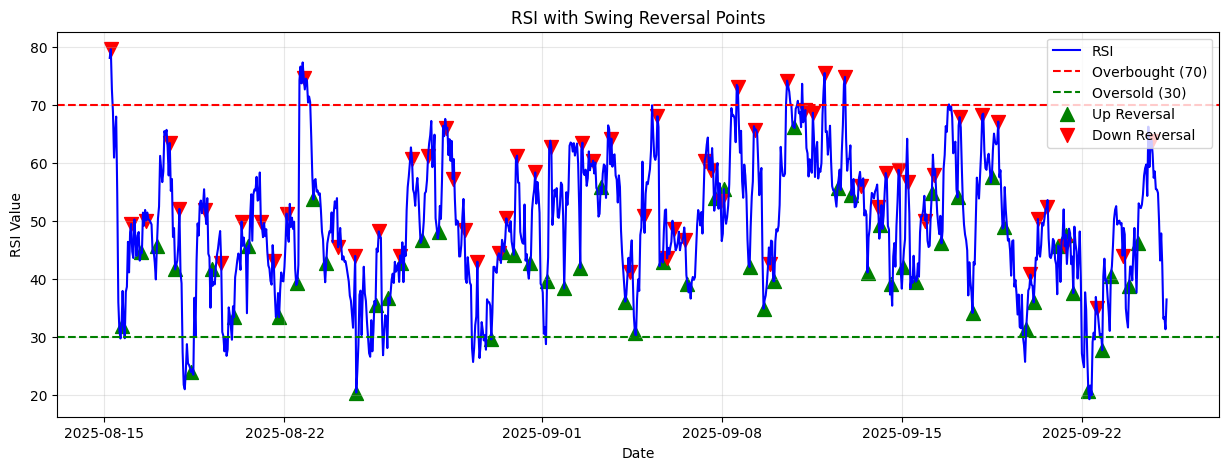

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# 1. Load CSV
# ------------------------------
CSV_PATH = "btc_reversal_rsi.csv"  # your CSV
df = pd.read_csv(CSV_PATH)

# Ensure Date is datetime and set as index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# ------------------------------
# 2. Plot RSI with reversal points
# ------------------------------
plt.figure(figsize=(15,5))

# RSI line
plt.plot(df.index, df['RSI'], color='blue', linewidth=1.5, label='RSI')

# Overbought / Oversold levels
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')

# Reversal points
plt.scatter(df.index[df['Label']==1], df['RSI'][df['Label']==1],
            marker='^', color='green', s=100, label='Up Reversal')
plt.scatter(df.index[df['Label']==-1], df['RSI'][df['Label']==-1],
            marker='v', color='red', s=100, label='Down Reversal')

plt.title("RSI with Swing Reversal Points")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
